In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/10-monkey-species/monkey_labels.txt
/kaggle/input/10-monkey-species/validation/validation/n8/n816.jpg
/kaggle/input/10-monkey-species/validation/validation/n8/n810.jpg
/kaggle/input/10-monkey-species/validation/validation/n8/n8016.jpg
/kaggle/input/10-monkey-species/validation/validation/n8/n809.jpg
/kaggle/input/10-monkey-species/validation/validation/n8/n801.jpg
/kaggle/input/10-monkey-species/validation/validation/n8/n806.jpg
/kaggle/input/10-monkey-species/validation/validation/n8/n804.jpg
/kaggle/input/10-monkey-species/validation/validation/n8/n811.jpg
/kaggle/input/10-monkey-species/validation/validation/n8/n815.jpg
/kaggle/input/10-monkey-species/validation/validation/n8/n813.jpg
/kaggle/input/10-monkey-species/validation/validation/n8/n8011.jpg
/kaggle/input/10-monkey-species/validation/validation/n8/n8012.jpg
/kaggle/input/10-monkey-species/validation/validation/n8/n8031.jpg
/kaggle/input/10-monkey-species/validation/validation/n8/n8015.jpg
/kaggle/input/10-monk

In [2]:
# Import all the necessary packages

import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras.layers import Flatten, Conv2D, MaxPool2D, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
import matplotlib.pyplot as plt
import numpy as np
import random
import os
from keras.applications.resnet50 import ResNet50, preprocess_input

In [3]:
# Outline of the dataset to be utilised
file = pd.read_csv("../input/10-monkey-species/monkey_labels.txt", names = ["Label", "Latin Name", "Common Name", "Training Images", "Valdation Images"], skiprows = 1)
file

,Label,Latin Name,Common Name,Training Images,Valdation Images
0,n0,alouatta_palliata\t,mantled_howler,131,26
1,n1,erythrocebus_patas\t,patas_monkey,139,28
2,n2,cacajao_calvus\t,bald_uakari,137,27
3,n3,macaca_fuscata\t,japanese_macaque,152,30
4,n4,cebuella_pygmea\t,pygmy_marmoset,131,26
5,n5,cebus_capucinus\t,white_headed_capuchin,141,28
6,n6,mico_argentatus\t,silvery_marmoset,132,26
7,n7,saimiri_sciureus\t,common_squirrel_monkey,142,28
8,n8,aotus_nigriceps\t,black_headed_night_monkey,133,27
9,n9,trachypithecus_johnii,nilgiri_langur,132,26


In [4]:
training_path = "../input/10-monkey-species/training/training"
validation_path = "../input/10-monkey-species/validation/validation"

In [5]:
# Function to display random images of each species
def DisplayImages(training_path, labels):
    i = 0
    for folder in os.listdir(training_path):
        species_path = os.path.join(training_path, folder)
        random_image = random.choice(os.listdir(species_path))
        #print(random_image)    
        img = load_img(species_path + '/' + random_image)
        #plt.tight_layout()
        plt.figure(figsize = (5,5))
        plt.axis(False)
        plt.title(labels[i], fontdict = {'fontsize' : 30})
        i += 1
        plt.imshow(img)
       
    


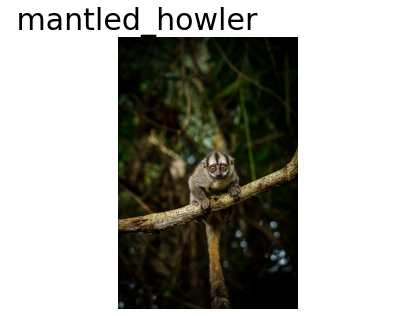

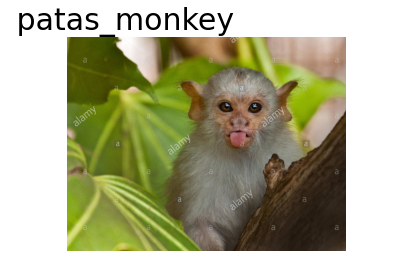

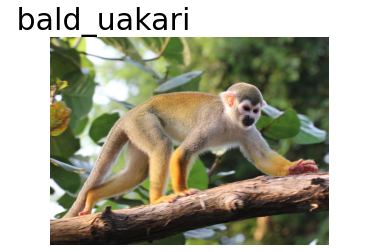

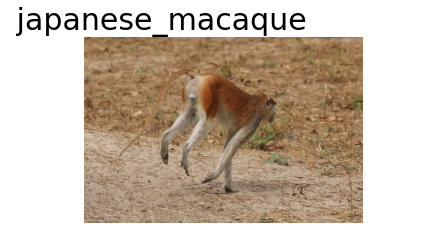

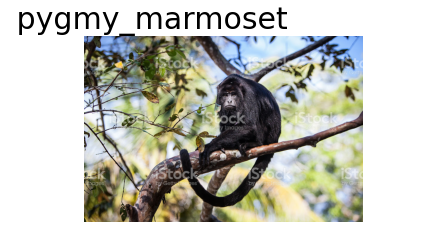

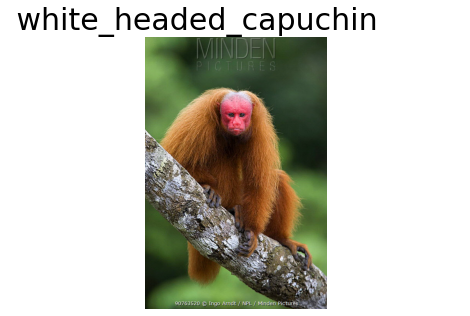

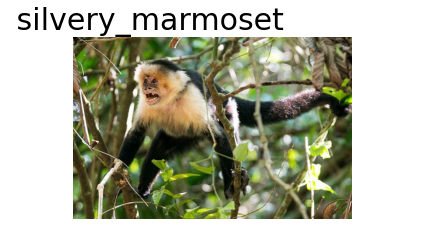

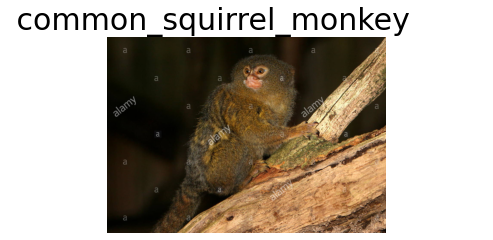

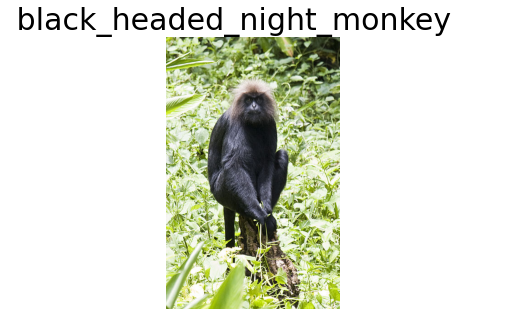

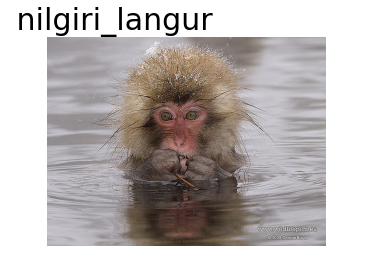

In [6]:
# Function call for displaying images
DisplayImages(training_path, file["Common Name"] )

In [7]:
def LoadResNet():
  model = ResNet50(weights = 'imagenet', include_top = True, input_shape=(224,224,3))
  return model

In [8]:
base_model = LoadResNet() 
base_model.summary()

102973440/102967424 [==============================] - 3s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
________________________

In [9]:
base_model_output = base_model.layers[-2].output

# add new layers 
x = Dropout(0.7, name='drop2')(base_model_output)
output = Dense(10, activation='softmax', name='fc3')(x)

# define a new model 
model = Model(base_model.input, output)

# Freeze all the base model layers 
for layer in base_model.layers[:-1]:
    layer.trainable=False

model.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr = 0.001), metrics=['accuracy'])
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [10]:
training_images = ImageDataGenerator(tf.keras.applications.resnet50.preprocess_input).flow_from_directory(training_path, target_size = (224,224), class_mode = 'categorical', batch_size = 30)
validation_images = ImageDataGenerator(tf.keras.applications.resnet50.preprocess_input).flow_from_directory(validation_path, target_size = (224, 224), class_mode = 'categorical', batch_size = 20)

Found 1098 images belonging to 10 classes.
Found 272 images belonging to 10 classes.


In [11]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if logs.get('val_accuracy') > 0.95:
      print("\nReached 95% training accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [12]:
resnet50model = model.fit_generator(training_images, steps_per_epoch = 35, 
                                          epochs = 100, validation_data= validation_images, validation_steps=13,
                                          callbacks = [callbacks])

/opt/conda/lib/python3.7/site-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/100
35/35 [==============================] - 115s 3s/step - loss: 2.9858 - accuracy: 0.2495 - val_loss: 0.9588 - val_accuracy: 0.7385
Epoch 2/100
35/35 [==============================] - 104s 3s/step - loss: 1.6551 - accuracy: 0.5096 - val_loss: 0.5773 - val_accuracy: 0.8269
Epoch 3/100
35/35 [==============================] - 104s 3s/step - loss: 1.0692 - accuracy: 0.6522 - val_loss: 0.4256 - val_accuracy: 0.8808
Epoch 4/100
35/35 [==============================] - 104s 3s/step - loss: 0.8428 - accuracy: 0.7274 - val_loss: 0.3621 - val_accuracy: 0.8692
Epoch 5/100
35/35 [==============================] - 105s 3s/step - loss: 0.6774 - accuracy: 0.7967 - val_loss: 0.3093 - val_accuracy: 0.9077
Epoch 6/100
35/35 [==============================] - 110s 3s/step - loss: 0.5828 - accuracy: 0.8025 - val_loss: 0.2674 - val_accuracy: 0.9154
Epoch 7/100
35/35 [==============================] - 103s 3s/step - loss: 0.4957 - accuracy: 0.8410 - val_loss: 0.3311 - val_accuracy: 0.8923
Epoch 

In [13]:
# Function to get the accuracy graphs for training and validation
def AccuracyComaprision(model):
    trn_acc = model.history['accuracy']
    vld_acc = model.history['val_accuracy']
    num_epochs = range(len(trn_acc))
    plt.plot(num_epochs, trn_acc)
    plt.plot(num_epochs, vld_acc)
    plt.legend(["Training Accuracy", "Validation Accuracy"])
    plt.grid(True)

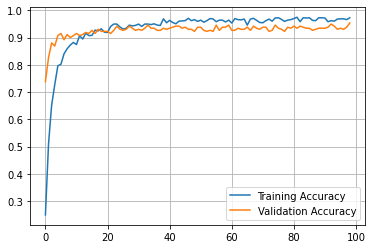

In [14]:
AccuracyComaprision(resnet50model)

In [15]:
# Function to get the loss graphs for training and validation
def LossComparision(model):
    vld_loss = model.history['val_loss']
    train_loss = model.history['loss']
    num_epochs = range(len(vld_loss))
    plt.plot(num_epochs, train_loss)
    plt.plot(num_epochs, vld_loss)
    plt.legend(["Training Loss", "Validation Loss"])
    plt.grid(True)
    

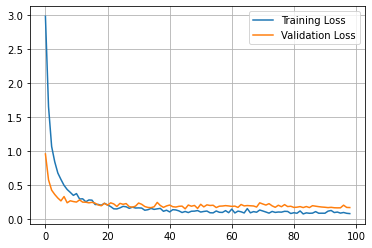

In [16]:
LossComparision(resnet50model)

If you like the notebook. Do give it an upvote!
Happy Kaggling!